In [1]:
!pip install seaborn wordcloud matplotlib

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [3]:
random_seed = 421

# Course counts per genre

In [4]:
course_genre_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML321EN-SkillsNetwork/labs/datasets/course_genre.csv"
course_df = pd.read_csv(course_genre_url)
course_df.dtypes

COURSE_ID          object
TITLE              object
Database            int64
Python              int64
CloudComputing      int64
DataAnalysis        int64
Containers          int64
MachineLearning     int64
ComputerVision      int64
DataScience         int64
BigData             int64
Chatbot             int64
R                   int64
BackendDev          int64
FrontendDev         int64
Blockchain          int64
dtype: object

In [5]:
course_df.head()

,COURSE_ID,TITLE,Database,Python,CloudComputing,DataAnalysis,Containers,MachineLearning,ComputerVision,DataScience,BigData,Chatbot,R,BackendDev,FrontendDev,Blockchain
0,ML0201EN,robots are coming build iot apps with watson ...,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1,ML0122EN,accelerating deep learning with gpu,0,1,0,0,0,1,0,1,0,0,0,0,0,0
2,GPXX0ZG0EN,consuming restful services using the reactive ...,0,0,0,0,0,0,0,0,0,0,0,1,1,0
3,RP0105EN,analyzing big data in r using apache spark,1,0,0,1,0,0,0,0,1,0,1,0,0,0
4,GPXX0Z2PEN,containerizing packaging and running a sprin...,0,0,0,0,1,0,0,0,0,0,0,1,0,0


In [6]:
course_df.describe()

,Database,Python,CloudComputing,DataAnalysis,Containers,MachineLearning,ComputerVision,DataScience,BigData,Chatbot,R,BackendDev,FrontendDev,Blockchain
count,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000
mean,0.195440,0.091205,0.120521,0.182410,0.055375,0.224756,0.032573,0.123779,0.117264,0.013029,0.055375,0.254072,0.061889,0.013029
std,0.397186,0.288371,0.326102,0.386813,0.229083,0.418103,0.177807,0.329866,0.322260,0.113585,0.229083,0.436049,0.241348,0.113585
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
topics_df = course_df.iloc[:,2:]
topics_df = topics_df.sum(axis=0).sort_values(ascending=False)
topics_df = topics_df.reset_index()
topics_df.columns = ['Genre', 'Count']

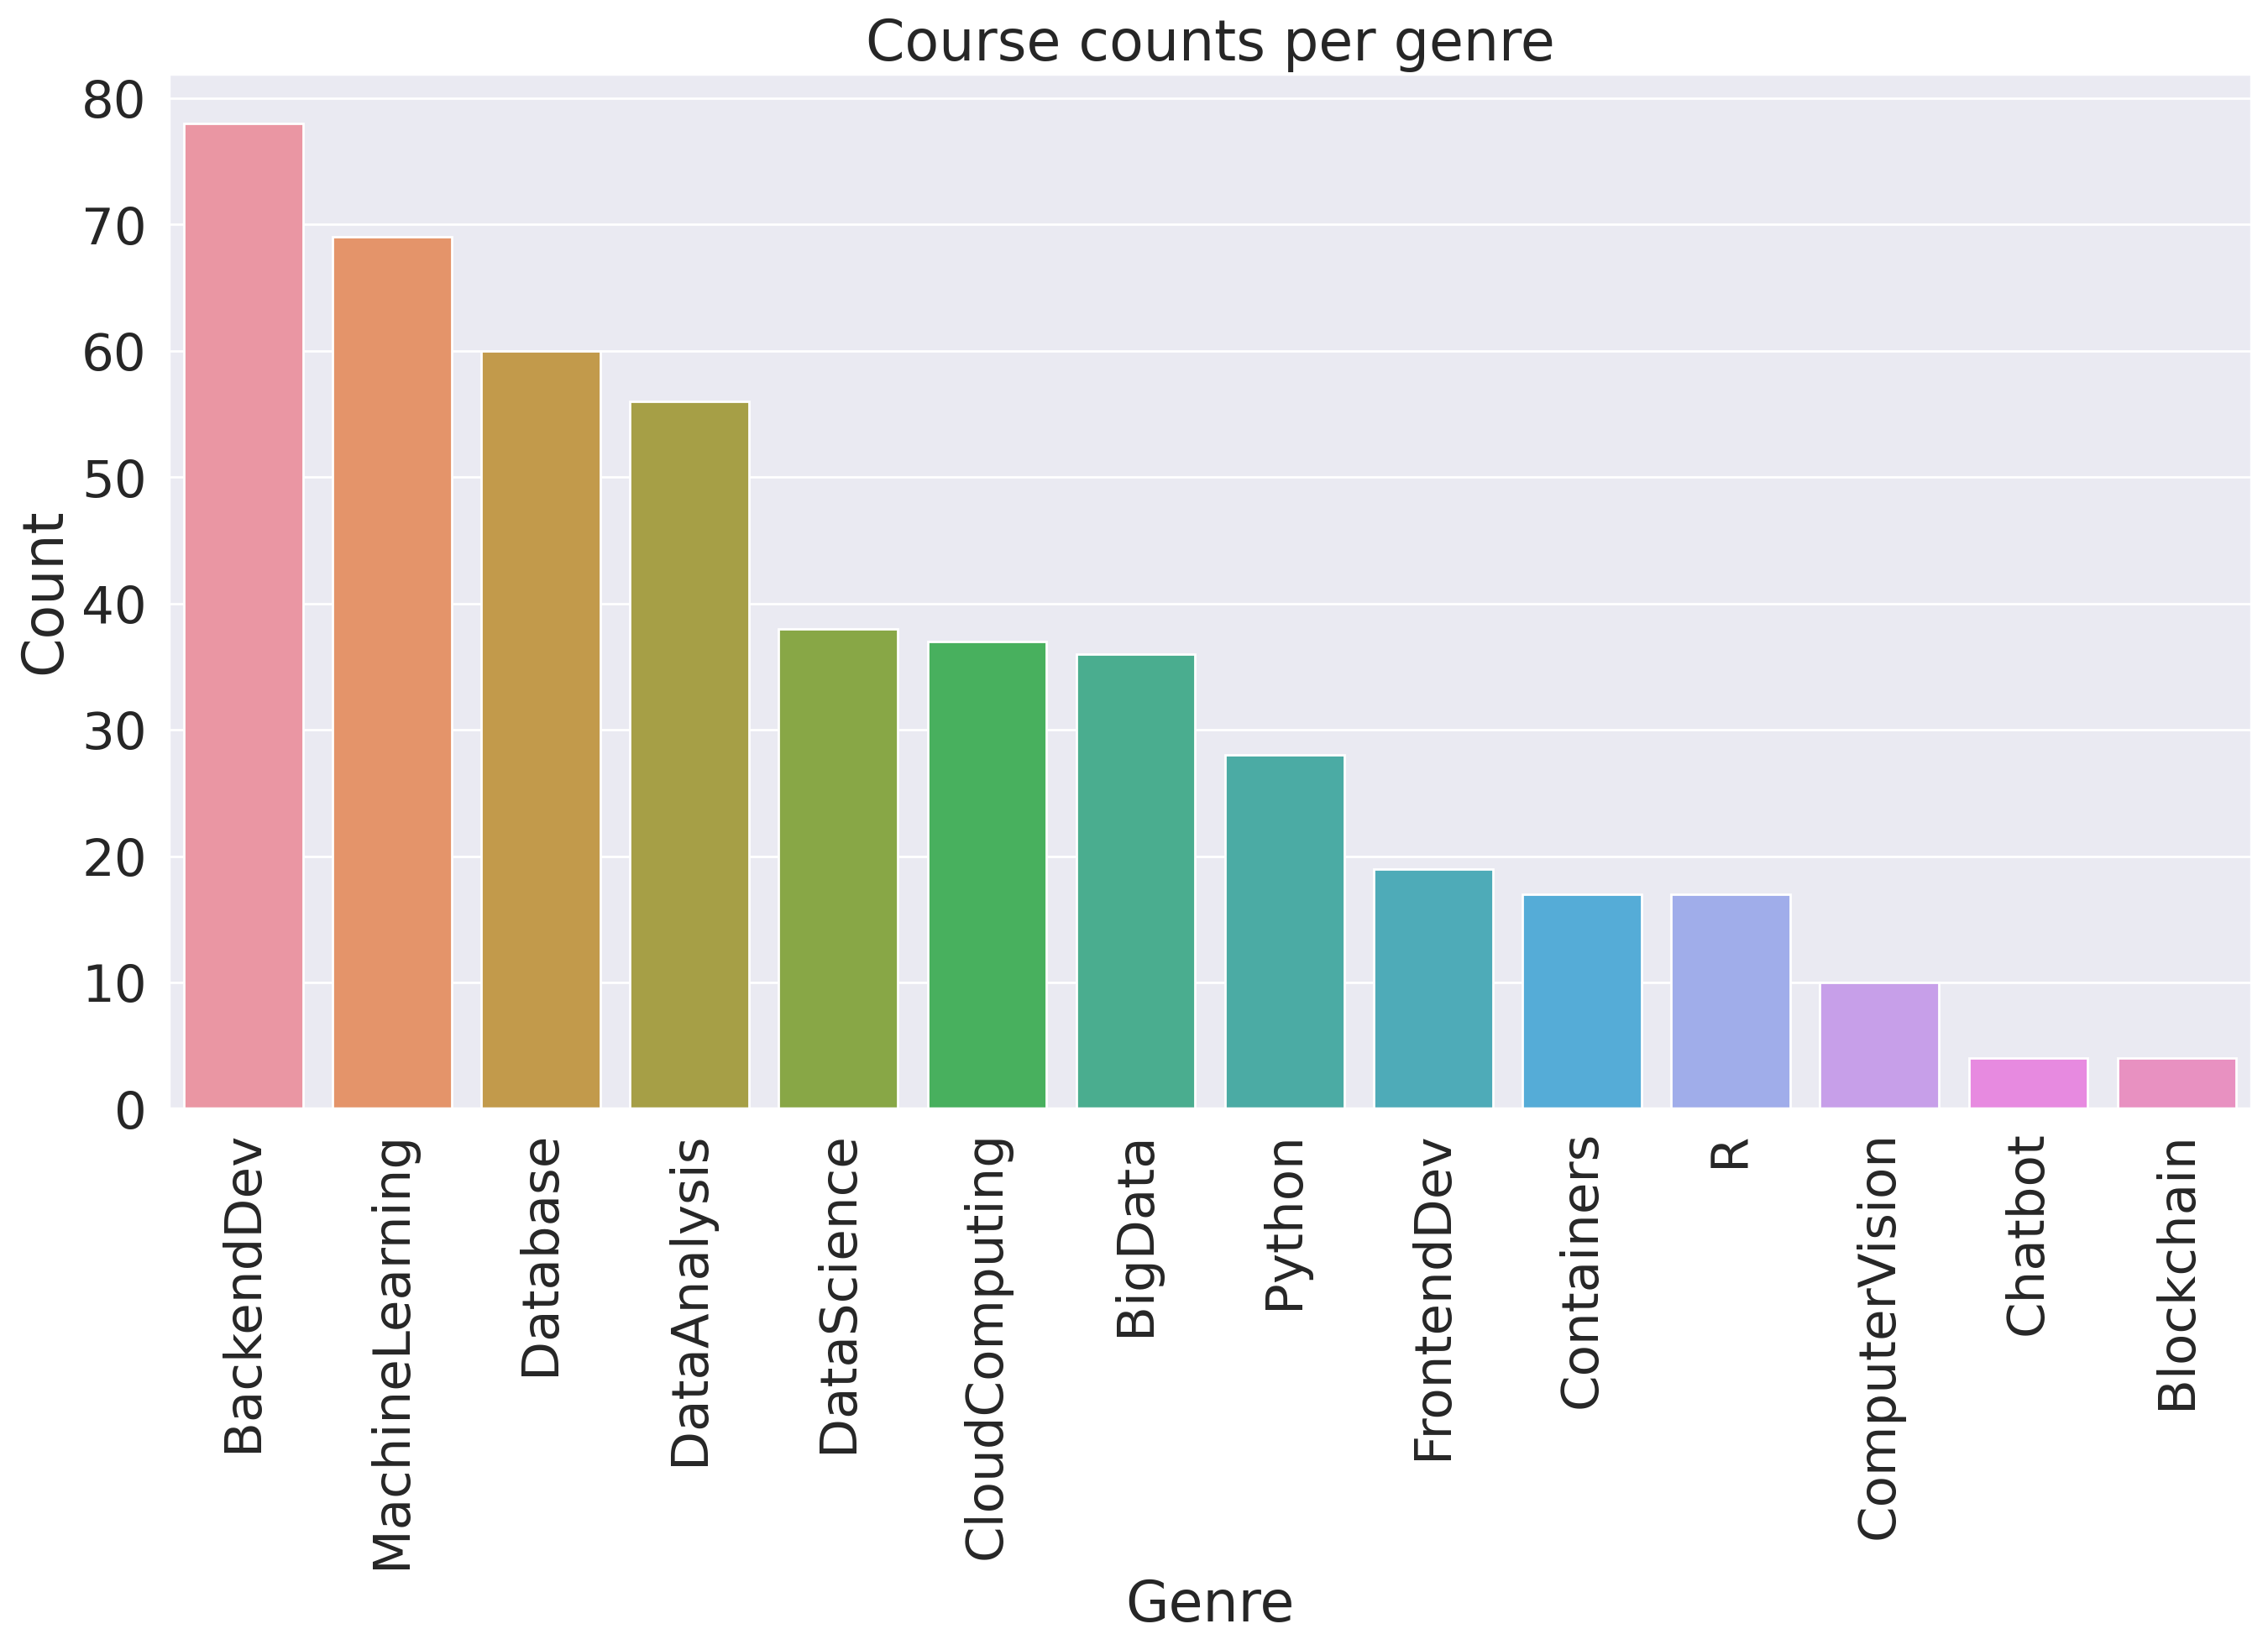

In [8]:
plt.figure(figsize=(16, 8), dpi=200)
sns.set(font_scale=2)
sns.barplot(x='Genre', y='Count', data=topics_df)
plt.xticks(rotation=90)
plt.title('Course counts per genre')
plt.show()

# Course enrollment distribution

In [9]:
ratings_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-ML0321EN-Coursera/labs/v2/module_3/ratings.csv"
ratings_df = pd.read_csv(ratings_url)
ratings_df.describe()

,user,rating
count,2.333060e+05,233306.000000
mean,1.099162e+06,3.998448
std,4.771661e+05,0.816058
min,2.000000e+00,3.000000
25%,7.210400e+05,3.000000
50%,1.080061e+06,4.000000
75%,1.466616e+06,5.000000
max,2.103039e+06,5.000000


In [10]:
### test_users = test_users_df.groupby(['user']).max().reset_index(drop=False)

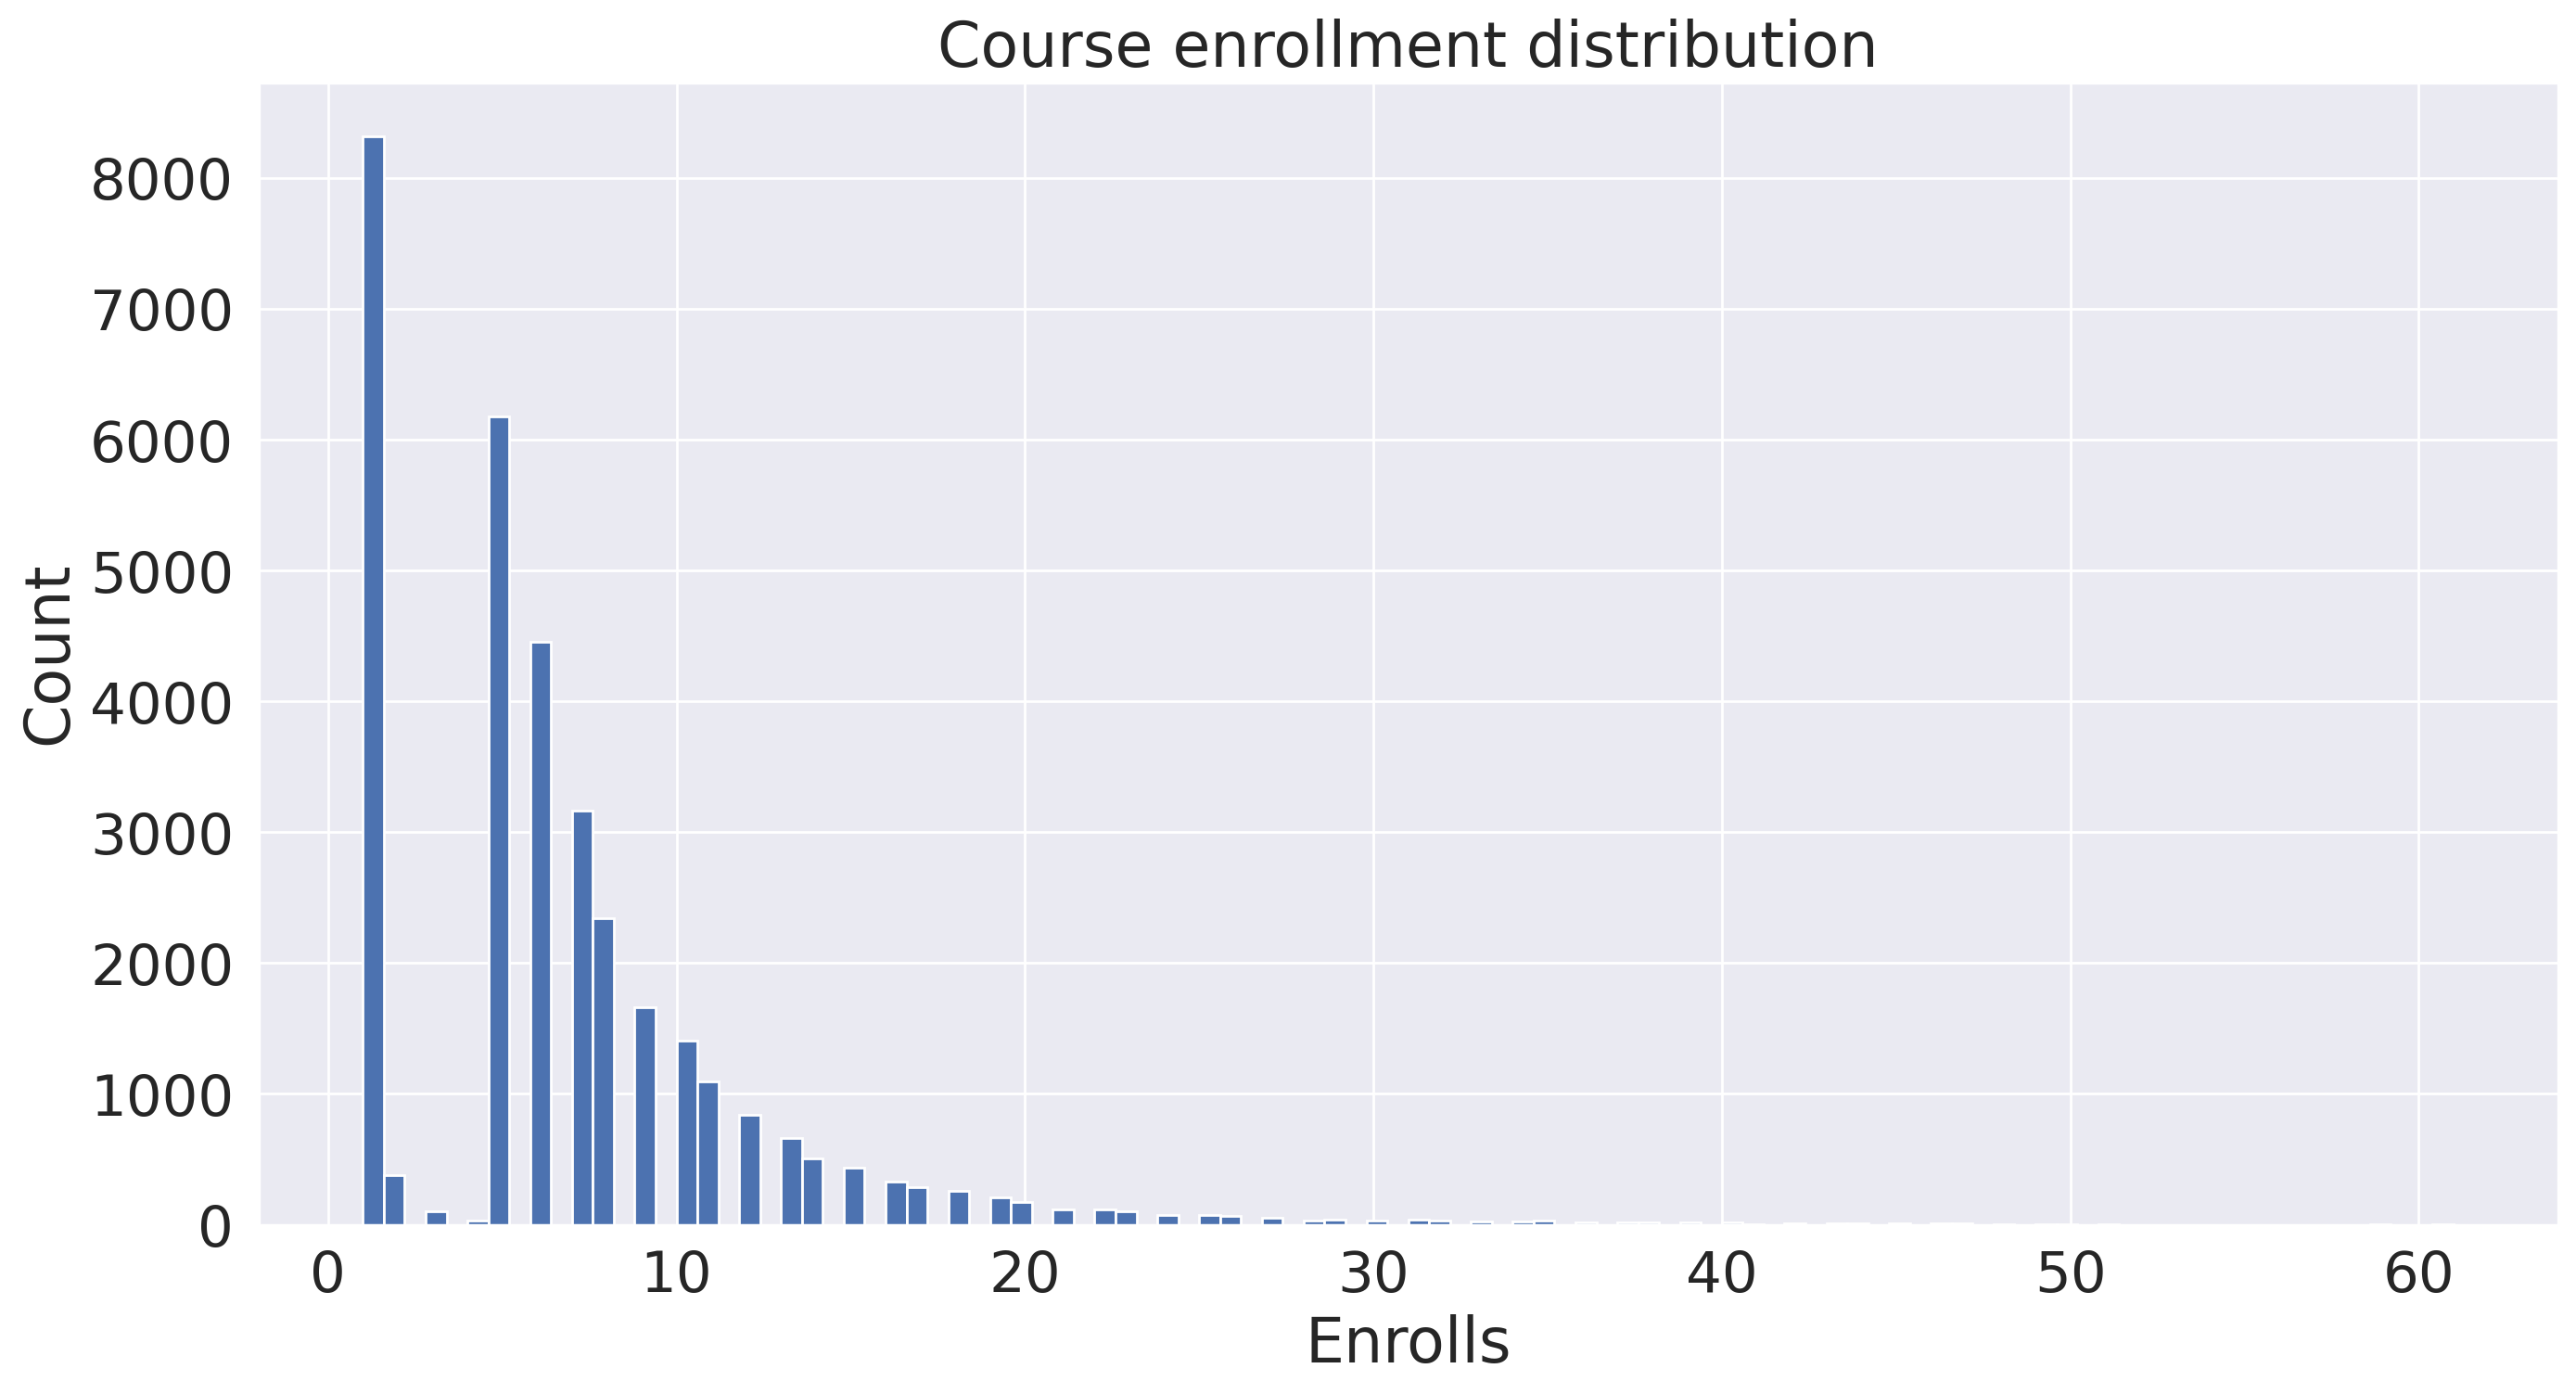

In [11]:
plt.figure(figsize=(16, 8), dpi=200)
ratings_df.groupby('user').size().hist(bins=100)
plt.title('Course enrollment distribution')
plt.xlabel('Enrolls')
plt.ylabel('Count')
plt.show()

# 20 most popular courses

In [12]:
df = ratings_df.groupby('item').size().reset_index()
df.columns=['Course', 'Enrolls']
df = df.sort_values(by='Enrolls', ascending=False).reset_index(drop=True).iloc[:20]

df2 = pd.merge(df, course_df[['COURSE_ID', 'TITLE']], how='left', left_on='Course', right_on='COURSE_ID')
df2.drop(labels='COURSE_ID', axis=1)

,Course,Enrolls,TITLE
0,PY0101EN,14936,python for data science
1,DS0101EN,14477,introduction to data science
2,BD0101EN,13291,big data 101
3,BD0111EN,10599,hadoop 101
4,DA0101EN,8303,data analysis with python
5,DS0103EN,7719,data science methodology
6,ML0101ENv3,7644,machine learning with python
7,BD0211EN,7551,spark fundamentals i
8,DS0105EN,7199,data science hands on with open source tools
9,BC0101EN,6719,blockchain essentials


# Word cloud of course titles

In [13]:
words = course_df['TITLE']
words = ' '.join(words)

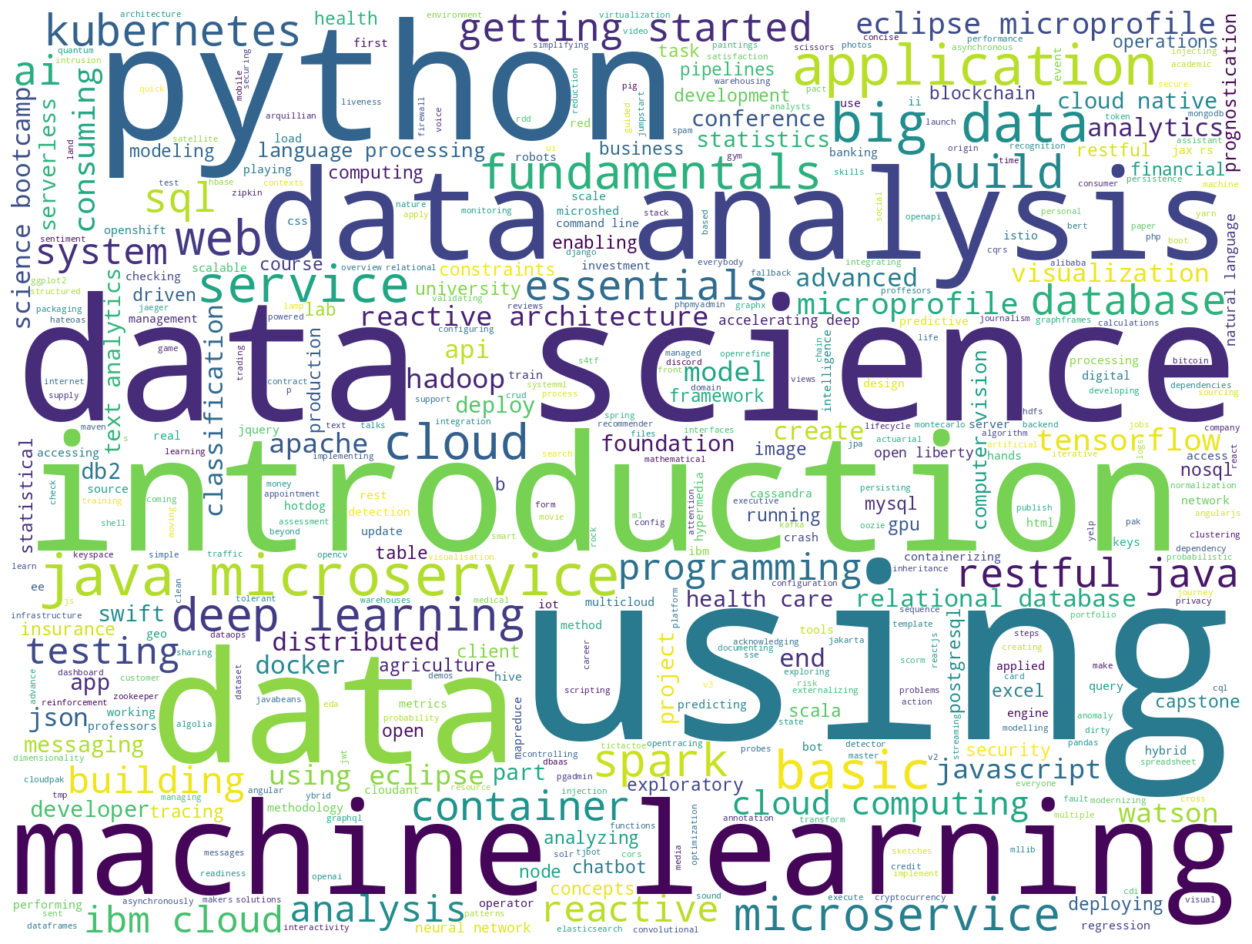

In [14]:
wordcloud = WordCloud(background_color="white", max_words=1000, random_state=random_seed, width=1600, height=1200)
wordcloud.generate(words)
plt.figure(figsize=(16, 12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


# User profile and course genres

https://labs.cognitiveclass.ai/v2/tools/jupyterlab?ulid=ulid-8189363558ff5f587037772b5ceb115ac49c1133

In [15]:
course_genre_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML321EN-SkillsNetwork/labs/datasets/course_genre.csv"
course_genres_df = pd.read_csv(course_genre_url)
course_genres_df.head()

,COURSE_ID,TITLE,Database,Python,CloudComputing,DataAnalysis,Containers,MachineLearning,ComputerVision,DataScience,BigData,Chatbot,R,BackendDev,FrontendDev,Blockchain
0,ML0201EN,robots are coming build iot apps with watson ...,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1,ML0122EN,accelerating deep learning with gpu,0,1,0,0,0,1,0,1,0,0,0,0,0,0
2,GPXX0ZG0EN,consuming restful services using the reactive ...,0,0,0,0,0,0,0,0,0,0,0,1,1,0
3,RP0105EN,analyzing big data in r using apache spark,1,0,0,1,0,0,0,0,1,0,1,0,0,0
4,GPXX0Z2PEN,containerizing packaging and running a sprin...,0,0,0,0,1,0,0,0,0,0,0,1,0,0


In [16]:
course_genres_df.describe()

,Database,Python,CloudComputing,DataAnalysis,Containers,MachineLearning,ComputerVision,DataScience,BigData,Chatbot,R,BackendDev,FrontendDev,Blockchain
count,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000
mean,0.195440,0.091205,0.120521,0.182410,0.055375,0.224756,0.032573,0.123779,0.117264,0.013029,0.055375,0.254072,0.061889,0.013029
std,0.397186,0.288371,0.326102,0.386813,0.229083,0.418103,0.177807,0.329866,0.322260,0.113585,0.229083,0.436049,0.241348,0.113585
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
user_profile_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML321EN-SkillsNetwork/labs/datasets/user_profile.csv"
user_profile_df = pd.read_csv(user_profile_url)
user_profile_df.head()

,user,Database,Python,CloudComputing,DataAnalysis,Containers,MachineLearning,ComputerVision,DataScience,BigData,Chatbot,R,BackendDev,FrontendDev,Blockchain
0,2,52.0,14.0,6.0,43.0,3.0,33.0,0.0,29.0,41.0,2.0,18.0,34.0,9.0,6.0
1,4,40.0,2.0,4.0,28.0,0.0,14.0,0.0,20.0,24.0,0.0,6.0,6.0,0.0,2.0
2,5,24.0,8.0,18.0,24.0,0.0,30.0,0.0,22.0,14.0,2.0,14.0,26.0,4.0,6.0
3,7,2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
4,8,6.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,6.0,0.0,2.0,0.0,0.0,0.0


In [18]:
user_profile_df.describe()

,user,Database,Python,CloudComputing,DataAnalysis,Containers,MachineLearning,ComputerVision,DataScience,BigData,Chatbot,R,BackendDev,FrontendDev,Blockchain
count,3.390100e+04,33901.000000,33901.000000,33901.000000,33901.000000,33901.000000,33901.000000,33901.000000,33901.000000,33901.000000,33901.000000,33901.000000,33901.000000,33901.000000,33901.000000
mean,1.064064e+06,5.518569,3.493791,2.307100,3.624701,0.998938,3.048022,0.001770,5.087343,4.750450,0.462995,1.017433,2.269461,0.315802,0.986844
std,4.972578e+05,7.611941,4.227254,3.841858,4.760135,2.351764,4.624004,0.072846,5.230697,7.216228,1.055186,2.342532,4.310752,1.363462,1.950585
min,2.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.813480e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.043907e+06,3.000000,3.000000,0.000000,3.000000,0.000000,0.000000,0.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.451159e+06,9.000000,6.000000,3.000000,6.000000,0.000000,3.000000,0.000000,9.000000,6.000000,0.000000,0.000000,3.000000,0.000000,2.000000
max,2.103039e+06,63.000000,18.000000,38.000000,48.000000,15.000000,39.000000,3.000000,32.000000,54.000000,6.000000,18.000000,54.000000,15.000000,12.000000


In [19]:
test_users_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-ML0321EN-Coursera/labs/v2/module_3/ratings.csv"
test_users_df = pd.read_csv(test_users_url)
test_users_df.head()

,user,item,rating
0,1889878,CC0101EN,5
1,1342067,CL0101EN,3
2,1990814,ML0120ENv3,5
3,380098,BD0211EN,5
4,779563,DS0101EN,3


In [20]:
test_users_df.describe()

,user,rating
count,2.333060e+05,233306.000000
mean,1.099162e+06,3.998448
std,4.771661e+05,0.816058
min,2.000000e+00,3.000000
25%,7.210400e+05,3.000000
50%,1.080061e+06,4.000000
75%,1.466616e+06,5.000000
max,2.103039e+06,5.000000


In [21]:
# Group the test users DataFrame by the 'user' column and find the maximum value for each group,
# then reset the index and drop the old index to obtain a DataFrame with unique user IDs
test_users = test_users_df.groupby(['user']).max().reset_index(drop=False)
test_users

,user,item,rating
0,2,WA0101EN,5
1,4,WA0103EN,5
2,5,WA0103EN,5
3,7,BD0211EN,4
4,8,RP0105EN,5
...,...,...,...
33896,2102054,RP0103EN,5
33897,2102356,CNSC02EN,3
33898,2102680,PY0101EN,5
33899,2102983,DS0132EN,5


In [22]:
# Extract the 'user' column from the test_users DataFrame and convert it to a list of user IDs
test_user_ids = test_users['user'].to_list()

In [23]:
test_user_profile = user_profile_df[user_profile_df['user'] == 1078030]
test_user_profile

,user,Database,Python,CloudComputing,DataAnalysis,Containers,MachineLearning,ComputerVision,DataScience,BigData,Chatbot,R,BackendDev,FrontendDev,Blockchain
18204,1078030,0.0,12.0,0.0,9.0,0.0,12.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
# Obtain the user vector
test_user_vector = test_user_profile.iloc[0, 1:].values
test_user_vector

array([ 0., 12.,  0.,  9.,  0., 12.,  0.,  6.,  0.,  0.,  0.,  0.,  0.,
        0.])

In [25]:
enrolled_courses = test_users_df[test_users_df['user'] == 1078030]['item'].to_list()
enrolled_courses = set(enrolled_courses)
enrolled_courses

{'DA0101EN',
 'DV0101EN',
 'ML0101ENv3',
 'ML0115EN',
 'ML0120ENv2',
 'ML0122ENv1',
 'PY0101EN',
 'ST0101EN'}

In [26]:
# Set of all courses:
all_courses = set(course_genres_df['COURSE_ID'].values)

In [27]:
# Set of all "unknown" courses in which the user 1078030 is not enrolled
unknown_courses = all_courses.difference(enrolled_courses)

In [28]:
# Obtain the genre vector
unknown_course_genres = course_genres_df[course_genres_df['COURSE_ID'].isin(unknown_courses)]
# Now let's get the course matrix by excluding `COURSE_ID` and `TITLE` columns:
course_matrix = unknown_course_genres.iloc[:, 2:].values
course_matrix

array([[0, 0, 0, ..., 1, 1, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 1, 1, 0]])

In [29]:
course_matrix[1]

array([0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0])

In [30]:
### Next, let's calculate the recommendation scores of all courses for all the 1000 test users.
test_users_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-ML0321EN-Coursera/labs/v2/module_3/ratings.csv"
user_profile_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML321EN-SkillsNetwork/labs/datasets/user_profile.csv"
course_genre_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML321EN-SkillsNetwork/labs/datasets/course_genre.csv"

# Reload the test users dataset from the specified URL using pandas and store it in test_users_df
test_users_df = pd.read_csv(test_users_url)

# Reload the user profiles dataset from the specified URL containing user profiles and their associated genres using pandas and store it in profile_df
user_profile_df = pd.read_csv(user_profile_url)

# Reload the course genres dataset from the specified URL containing course genres using pandas and store it in course_genres_df
course_genres_df = pd.read_csv(course_genre_url)

# Create an empty dictionary to store the results of the recommendation process
res_dict = {}

score_threshold = 10

In [31]:
def generate_recommendation_scores():
    """
    Generate recommendation scores for users and courses.

    Returns:
    users (list): List of user IDs.
    courses (list): List of recommended course IDs.
    scores (list): List of recommendation scores.
    """

    users = []      # List to store user IDs
    courses = []    # List to store recommended course IDs
    scores = []     # List to store recommendation scores

    # Iterate over each user ID in the test_user_ids list
    for user_id in test_user_ids:
        # Get the user profile data for the current user
        test_user_profile = user_profile_df[user_profile_df['user'] == user_id]

        # Get the user vector for the current user id (replace with your method to obtain the user vector)
        test_user_vector = test_user_profile.iloc[0, 1:].values

        # Get the known course ids for the current user
        enrolled_courses = test_users_df[test_users_df['user'] == user_id]['item'].to_list()

        # Calculate the unknown course ids
        unknown_courses = all_courses.difference(enrolled_courses)

        # Filter the course_genres_df to include only unknown courses
        unknown_course_df = course_genres_df[course_genres_df['COURSE_ID'].isin(unknown_courses)]
        unknown_course_ids = unknown_course_df['COURSE_ID'].values

        # Calculate the recommendation scores using dot product
        recommendation_scores = np.dot(unknown_course_df.iloc[:, 2:].values, test_user_vector)

        # Append the results into the users, courses, and scores list
        for i in range(0, len(unknown_course_ids)):
            score = recommendation_scores[i]

            # Only keep the courses with high recommendation score
            if score >= score_threshold:
                users.append(user_id)
                courses.append(unknown_course_ids[i])
                scores.append(recommendation_scores[i])

    return users, courses, scores

In [32]:
# Call the generate_recommendation_scores function to obtain recommendation scores for users and courses,
# and assign the returned lists to variables users, courses, and scores
users, courses, scores = generate_recommendation_scores()

# Create an empty dictionary named res_dict to store the results of the recommendation process
res_dict = {}

# Store the lists of users, courses, and scores into the res_dict dictionary with corresponding keys
res_dict['USER'] = users
res_dict['COURSE_ID'] = courses
res_dict['SCORE'] = scores

# Create a DataFrame named res_df using the res_dict dictionary, specifying the column order as ['USER', 'COURSE_ID', 'SCORE']
res_df = pd.DataFrame(res_dict, columns=['USER', 'COURSE_ID', 'SCORE'])

# Save the res_df DataFrame to a CSV file named "profile_rs_results.csv" without including the index
res_df.to_csv("profile_rs_results.csv", index=False)

# Output the res_df DataFrame
res_df

,USER,COURSE_ID,SCORE
0,2,ML0201EN,43.0
1,2,GPXX0ZG0EN,43.0
2,2,GPXX0Z2PEN,37.0
3,2,DX0106EN,47.0
4,2,GPXX06RFEN,52.0
...,...,...,...
1500419,2102680,excourse62,15.0
1500420,2102680,excourse69,14.0
1500421,2102680,excourse77,14.0
1500422,2102680,excourse78,14.0


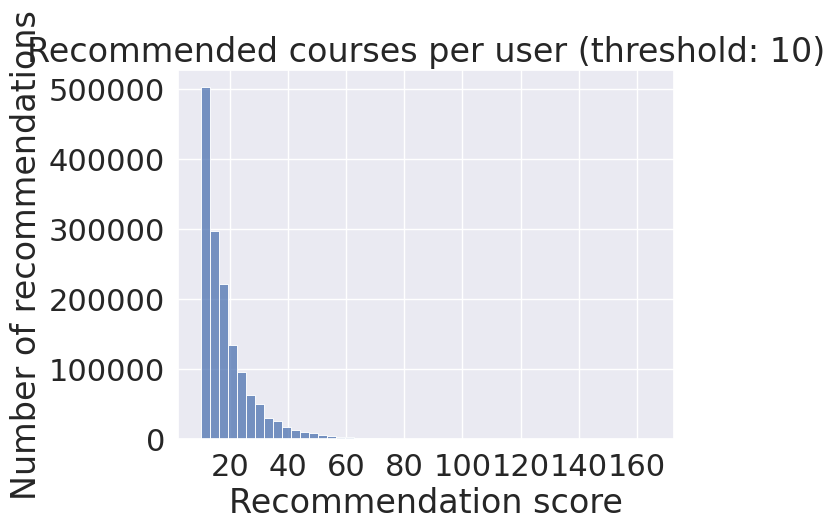

In [33]:
ax = sns.histplot(res_df['SCORE'], bins=50)
ax.set_title('Recommended courses per user (threshold: {})'.format(score_threshold))
ax.set_ylabel('Number of recommendations')
ax.set_xlabel('Recommendation score')
sns.set(font_scale=0.7)

In [34]:
u = res_df.groupby('USER')['USER'].count().mean()
u

60.82471217772012

In [35]:
u = res_df['USER'].value_counts().mean()
u

60.82471217772012

In [36]:
u = res_df['COURSE_ID'].value_counts()
u.head(20)

TA0106EN      17390
excourse22    15656
excourse21    15656
GPXX0IBEN     15644
ML0122EN      15603
excourse06    15062
excourse04    15062
GPXX0TY1EN    14689
excourse73    14464
excourse72    14464
excourse31    14460
TMP0105EN     14271
RP0105EN      14187
ML0101EN      14026
SC0103EN      13195
excourse62    13040
DX0108EN      13039
TMP107        13038
excourse12    12878
BD0212EN      12483
Name: COURSE_ID, dtype: int64

# Similarity-based course recommender system

In [18]:
# Load a pre-made course similarity matrix.
sim_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML321EN-SkillsNetwork/labs/datasets/sim.csv"
sim_df = pd.read_csv(sim_url)
sim_df.head()

course_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML321EN-SkillsNetwork/labs/datasets/course_processed.csv"
bow_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML321EN-SkillsNetwork/labs/datasets/courses_bows.csv"

,0,1,2,3,4,5,6,7,8,9,...,297,298,299,300,301,302,303,304,305,306
0,1.000000,0.088889,0.088475,0.065556,0.048810,0.104685,0.065202,0.143346,0.000000,0.024405,...,0.012695,0.070225,0.058224,0.046610,0.025850,0.033944,0.076825,0.072898,0.039276,0.121113
1,0.088889,1.000000,0.055202,0.057264,0.012182,0.078379,0.032545,0.119251,0.044162,0.000000,...,0.180593,0.124631,0.087187,0.093060,0.019354,0.028239,0.063911,0.138270,0.031367,0.076940
2,0.088475,0.055202,1.000000,0.026463,0.039406,0.000000,0.000000,0.154303,0.000000,0.000000,...,0.040996,0.037796,0.013430,0.037630,0.000000,0.018270,0.082698,0.133400,0.012684,0.000000
3,0.065556,0.057264,0.026463,1.000000,0.000000,0.250490,0.390038,0.000000,0.000000,0.000000,...,0.151882,0.420084,0.427908,0.055764,0.000000,0.094759,0.030638,0.017443,0.018796,0.158073
4,0.048810,0.012182,0.039406,0.000000,1.000000,0.000000,0.000000,0.085126,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.096877,0.000000,0.060474,0.030415,0.129871,0.000000,0.000000


In [43]:
course_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML321EN-SkillsNetwork/labs/datasets/course_processed.csv"
bow_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML321EN-SkillsNetwork/labs/datasets/courses_bows.csv"
user_profile_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML321EN-SkillsNetwork/labs/datasets/user_profile.csv"
test_users_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-ML0321EN-Coursera/labs/v2/module_3/ratings.csv"

In [44]:
user_profile_df = pd.read_csv(user_profile_url)
user_profile_df.head()

,user,Database,Python,CloudComputing,DataAnalysis,Containers,MachineLearning,ComputerVision,DataScience,BigData,Chatbot,R,BackendDev,FrontendDev,Blockchain
0,2,52.0,14.0,6.0,43.0,3.0,33.0,0.0,29.0,41.0,2.0,18.0,34.0,9.0,6.0
1,4,40.0,2.0,4.0,28.0,0.0,14.0,0.0,20.0,24.0,0.0,6.0,6.0,0.0,2.0
2,5,24.0,8.0,18.0,24.0,0.0,30.0,0.0,22.0,14.0,2.0,14.0,26.0,4.0,6.0
3,7,2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
4,8,6.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,6.0,0.0,2.0,0.0,0.0,0.0


In [40]:
test_users_df = pd.read_csv(test_users_url)
test_users_df.head()

,user,item,rating
0,1889878,CC0101EN,5
1,1342067,CL0101EN,3
2,1990814,ML0120ENv3,5
3,380098,BD0211EN,5
4,779563,DS0101EN,3


In [28]:
bow_df = pd.read_csv(bow_url)
bow_df.head()

,doc_index,doc_id,token,bow
0,0,ML0201EN,ai,2
1,0,ML0201EN,apps,2
2,0,ML0201EN,build,2
3,0,ML0201EN,cloud,1
4,0,ML0201EN,coming,1


In [32]:
all_courses = set(course_df['COURSE_ID'])

In [90]:
# Create course id to index and index to id mappings
def get_doc_dicts(bow_df):
    # Group the DataFrame by course index and ID, and get the maximum value for each group
    grouped_df = bow_df.groupby(['doc_index', 'doc_id']).max().reset_index(drop=False)
    # Create a dictionary mapping indices to course IDs
    idx_id_dict = grouped_df[['doc_id']].to_dict()['doc_id']
    # Create a dictionary mapping course IDs to indices
    id_idx_dict = {v: k for k, v in idx_id_dict.items()}
    # Clean up temporary DataFrame
    del grouped_df
    return idx_id_dict, id_idx_dict
idx_id_dict, id_idx_dict = get_doc_dicts(bow_df)

print(id_idx_dict)

print(id_idx_dict['CC0121EN'])

{'ML0201EN': 0, 'ML0122EN': 1, 'GPXX0ZG0EN': 2, 'RP0105EN': 3, 'GPXX0Z2PEN': 4, 'CNSC02EN': 5, 'DX0106EN': 6, 'GPXX0FTCEN': 7, 'RAVSCTEST1': 8, 'GPXX06RFEN': 9, 'GPXX0SDXEN': 10, 'CC0271EN': 11, 'WA0103EN': 12, 'DX0108EN': 13, 'GPXX0PICEN': 14, 'DAI101EN': 15, 'GPXX0W7KEN': 16, 'GPXX0QR3EN': 17, 'BD0145EN': 18, 'HCC105EN': 19, 'DE0205EN': 20, 'DS0132EN': 21, 'OS0101EN': 22, 'DS0201EN': 23, 'BENTEST4': 24, 'CC0210EN': 25, 'PA0103EN': 26, 'HCC104EN': 27, 'GPXX0A1YEN': 28, 'TMP0105EN': 29, 'PA0107EN': 30, 'DB0113EN': 31, 'PA0109EN': 32, 'PHPM002EN': 33, 'GPXX03HFEN': 34, 'RP0103': 35, 'RP0103EN': 36, 'BD0212EN': 37, 'GPXX0IBEN': 38, 'SECM03EN': 39, 'SC0103EN': 40, 'GPXX0YXHEN': 41, 'RP0151EN': 42, 'TA0105': 43, 'SW0201EN': 44, 'TMP0106': 45, 'GPXX0BUBEN': 46, 'ST0201EN': 47, 'ST0301EN': 48, 'SW0101EN': 49, 'TMP0101EN': 50, 'DW0101EN': 51, 'BD0143EN': 52, 'WA0101EN': 53, 'GPXX04HEEN': 54, 'BD0141EN': 55, 'CO0401EN': 56, 'ML0122ENv1': 57, 'BD0151EN': 58, 'TA0106EN': 59, 'TMP107': 60, 'ML011

In [25]:
sim_matrix = sim_df.to_numpy()

In [82]:
test_users = test_users_df.groupby(['user']).max().reset_index(drop=False)
test_user_ids = test_users['user'].to_list()


u = test_user_ids[0]
print(u)

k = test_users_df[test_users_df['user'] == u].item.to_list()
print(k)

2
['LB0105ENv1', 'ST0101EN', 'PY0101EN', 'ML0120ENv2', 'DA0101EN', 'BD0123EN', 'BD0151EN', 'RP0103', 'DV0101EN', 'BC0101EN', 'SC0101EN', 'BD0223EN', 'BD0153EN', 'BD0212EN', 'BD0145EN', 'CL0101EN', 'BD0137EN', 'BD0221EN', 'TMP0105EN', 'WA0101EN', 'BD0135EN', 'BD0141EN', 'DB0101EN', 'LB0101ENv1', 'TA0106EN', 'CO0101EN', 'BD0211EN', 'BD0101EN', 'TMP0106', 'BD0121EN', 'RP0105EN', 'ML0115EN', 'DS0321EN', 'BD0111EN', 'ML0101EN', 'DV0151EN', 'DS0301EN', 'TA0105', 'LB0107ENv1', 'LB0109ENv1', 'LB0111EN', 'DS0103EN', 'DP0101EN', 'ML0103EN', 'BD0133EN', 'ML0122ENv1', 'RP0101EN', 'SC0103EN', 'BD0131EN', 'CP0101EN', 'SC0105EN', 'BD0143EN', 'ML0109EN', 'RP0151EN', 'PA0101EN', 'CB0103EN', 'DJ0101EN', 'RP0103EN', 'ML0122EN', 'LB0103ENv1', 'ML0120EN']


In [75]:

print(test_user_ids[0:5])

[2, 4, 5, 7, 8]


In [102]:
def generate_recommendations_for_one_user(enrolled_course_ids, unselected_course_ids, id_idx_dict, sim_matrix):
    # Create a dictionary to store your recommendation results
    res = {}
    # Set a threshold for similarity
    threshold = 0.6 
    # Iterate over enrolled courses
    for enrolled_course in enrolled_course_ids:
        # Iterate over unselected courses
        for unselect_course in unselected_course_ids:
            # Check if both enrolled and unselected courses exist in the id_idx_dict
            if enrolled_course in id_idx_dict and unselect_course in id_idx_dict:
                # Initialize similarity value
                sim = 0
                # Find the two indices for each enrolled_course and unselect_course, based on their two ids
                # Calculate the similarity between an enrolled_course and an unselect_course
                # e.g., Course ML0151EN's index is 200 and Course ML0101ENv3's index is 158
                
                # Find the similarity value from the sim_matrix
                id_enrolled_course = id_idx_dict[enrolled_course]
                id_unselect_course = id_idx_dict[unselect_course]                
                sim = sim_matrix[id_enrolled_course][id_unselect_course]                
                
                 # Check if the similarity exceeds the threshold
                if sim > threshold:
                    # Update recommendation dictionary with course ID and similarity score
                    if unselect_course not in res:
                        # If the unselected course is not already in the recommendation dictionary (`res`), add it.
                        res[unselect_course] = sim
                    else:
                        # If the unselected course is already in the recommendation dictionary (`res`), compare the similarity score.
                        # If the current similarity score is greater than or equal to the existing similarity score for the course,
                        # update the similarity score in the recommendation dictionary (`res`) with the current similarity score.
                        if sim >= res[unselect_course]:
                            res[unselect_course] = sim
                            
    # Sort the results by similarity
    res = {k: v for k, v in sorted(res.items(), key=lambda item: item[1], reverse=True)}

    #print(res)
    
    return res

In [109]:
def generate_recommendations_for_all_users():
    courses = {}
    courses_per_user = []
    
    test_users_df = pd.read_csv(test_users_url)    
    course_df = pd.read_csv(course_url)    
    bow_df = pd.read_csv(bow_url)
    
    test_users = test_users_df.groupby(['user']).max().reset_index(drop=False)
    test_user_ids = test_users['user'].to_list()
    

    for user_id in test_user_ids:
        enrolled_course_ids = test_users_df[test_users_df['user'] == user_id].item.to_list()        
        unselected_course_ids = all_courses.difference(enrolled_course_ids)
        res = generate_recommendations_for_one_user(enrolled_course_ids, unselected_course_ids, id_idx_dict, sim_matrix)
        courses_per_user.append(len(res))

        for key in res.keys():
            if key in courses:
                courses[key] += 1
            else:
                courses[key] = 1
    
    return courses, courses_per_user

courses, courses_per_user = generate_recommendations_for_all_users()

courses_per_user = np.asarray(courses_per_user)
print('Number of recommended courses per user (avg +/- std): {} +/- {}\n'.format(np.mean(courses_per_user), np.std(courses_per_user)))

courses = dict(sorted(courses.items(), key=lambda item: item[1], reverse=True))
print('Most recommended courses: {}'.format(courses))

Number of recommended courses per user (avg +/- std): 8.546591545972095 +/- 6.870187957501827

Most recommended courses: {'DS0110EN': 15003, 'excourse22': 14937, 'excourse62': 14937, 'excourse63': 14641, 'excourse65': 14641, 'excourse68': 13551, 'excourse72': 13512, 'excourse67': 13291, 'excourse74': 13291, 'BD0145EN': 12497, 'excourse46': 8758, 'excourse47': 8758, 'excourse23': 8526, 'excourse36': 8526, 'excourse32': 8526, 'excourse38': 8526, 'excourse33': 8526, 'excourse09': 8526, 'excourse24': 7789, 'ML0151EN': 6578, 'ML0122ENv3': 6406, 'excourse60': 6323, 'DV0151EN': 5818, 'CB0101EN': 5466, 'excourse28': 4983, 'excourse25': 4983, 'ML0120ENv3': 4164, 'ML0120EN': 3425, 'ML0122ENv1': 2867, 'CC0103EN': 2472, 'CL0101EN': 2349, 'WA0103EN': 2204, 'ML0120ENv2': 1904, 'TA0105': 1174, 'ML0101ENv3': 1114, 'CO0401EN': 1101, 'DV0101EN': 985, 'TMP0101EN': 912, 'BD0151EN': 896, 'TA0105EN': 894, 'LB0105ENv1': 596, 'DX0106EN': 551, 'TMP107': 550, 'DS0132EN': 518, 'TMP0106': 517, 'excourse04': 516, 

# Clustering-based

In [ ]:
user_profile_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML321EN-SkillsNetwork/labs/datasets/user_profile.csv"
user_profile_df = pd.read_csv(user_profile_url)

feature_names = list(user_profile_df.columns[1:])

scaler = StandardScaler()
user_profile_df[feature_names] = scaler.fit_transform(user_profile_df[feature_names])

features = user_profile_df.loc[:, user_profile_df.columns != 'user']

number_of_clusters = 18
kmeans = KMeans(n_clusters=number_of_clusters, random_state=rs).fit(features)
cluster_labels = kmeans.labels_

In [ ]:
test_user_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-ML0321EN-Coursera/labs/v2/module_3/ratings.csv"

test_users_df = pd.read_csv(test_user_url)[['user', 'item']]

test_users_labelled = pd.merge(test_users_df, cluster_df, left_on='user', right_on='user')

courses_cluster = test_users_labelled[['item', 'cluster']]

courses_cluster['count'] = [1] * len(courses_cluster)

courses_cluster_grouped = courses_cluster.groupby(['cluster','item']).agg(enrollments=('count','sum')).reset_index()

In [ ]:
number_of_recommended_courses_per_user = []
recommended_courses = {}
popularity_threshold = 100

users = []

for table_id in range(test_users_labelled.shape[0]):

    user_labelled = test_users_labelled.iloc[table_id,:]
    user_id = user_labelled['user']
    
    if not user_id in users:
        users.append(user_id)
        
        cluster_for_this_user = user_labelled['cluster']
    
        enrolled_courses_for_this_user = test_users_labelled.loc[test_users_labelled['user'] == user_id]
        all_courses_of_this_cluster = test_users_labelled.loc[test_users_labelled['cluster'] == cluster_for_this_user]
        count_of_all_courses_of_this_cluster = all_courses_of_this_cluster['item'].value_counts()
        
        popular_courses_of_this_cluster = count_of_all_courses_of_this_cluster[count_of_all_courses_of_this_cluster>popularity_threshold]
        
        enrolled_courses_for_this_user = [i for _,i in enumerate(enrolled_courses_for_this_user['item'])]
        popular_courses_of_this_cluster = [i for _,i in enumerate(popular_courses_of_this_cluster.index)]
        popular_candidate_courses = list(set(popular_courses_of_this_cluster) - set(enrolled_courses_for_this_user))
    
        number_of_recommended_courses_per_user.append(len(popular_candidate_courses))
        
        for course in popular_candidate_courses:
            if course in recommended_courses:
                recommended_courses[course] += 1
            else:
                recommended_courses[course] = 1
    
print('Number of recommended courses per user (avg +/- std): {} +/- {}\n'.format(np.mean(number_of_recommended_courses_per_user), np.std(number_of_recommended_courses_per_user)))

recommended_courses = dict(sorted(recommended_courses.items(), key=lambda item: item[1], reverse=True))
print('Most recommended courses: {}'.format(recommended_courses))

# Collaborative-filtering (KNN)

In [2]:
from surprise import KNNBasic
from surprise import Dataset, Reader
from surprise.model_selection import train_test_split
from surprise import accuracy

In [3]:
ratings_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-ML0321EN-Coursera/labs/v2/module_3/ratings.csv"
ratings_df = pd.read_csv(ratings_url)
ratings_df.head()

,user,item,rating
0,1889878,CC0101EN,5
1,1342067,CL0101EN,3
2,1990814,ML0120ENv3,5
3,380098,BD0211EN,5
4,779563,DS0101EN,3


In [4]:
ratings_df.to_csv("course_ratings.csv", index=False)
reader = Reader(line_format='user item rating', sep=',', skip_lines=1, rating_scale=(2, 3))
course_rating_dataset = Dataset.load_from_file("course_ratings.csv", reader=reader)
trainset, testset = train_test_split(course_rating_dataset, test_size=0.25)

In [ ]:
sim_options = {"name": "cosine", "user_based": True}
algo_item_based = KNNBasic(sim_options=sim_options)
algo_user_based.fit(trainset)
predictions_user_based = algo_user_based.test(testset)
rmse_user_based = accuracy.rmse(predictions_user_based)
print('KNN (user based), RMSE={}'.format(rmse_user_based))

In [ ]:
sim_options = {"name": "cosine", "user_based": False}
algo_item_based = KNNBasic(sim_options=sim_options)
algo_item_based.fit(trainset)
predictions_item_based = algo_item_based.test(testset)
rmse_item_based = accuracy.rmse(predictions_item_based)
print('KNN (item based), RMSE={}'.format(rmse_item_based))

In [ ]:
nmf = NMF(verbose=True, random_state=421, n_epochs=100)
nmf.fit(trainset)
predictions=nmf.test(testset)
rmse_nmf=accuracy.rmse(predictions)
print('NMF), RMSE={}'.format(rmse_nmf))